### Importación de datos



In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar columna de tienda
tienda1["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

# Unir todos los dataframes
datos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Revisar columnas
print(datos.columns)


tienda1.head()


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Opcional para mejorar el estilo de los gráficos
sns.set(style="whitegrid")


#1. Análisis de facturación



In [21]:
facturacion_total = datos["Precio"].sum()
print("Facturación total:", facturacion_total)

Facturación total: 4403619200.0


<ipython-input-23-509900125>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion_por_tienda.index, y=facturacion_por_tienda.values, palette="Blues_d")


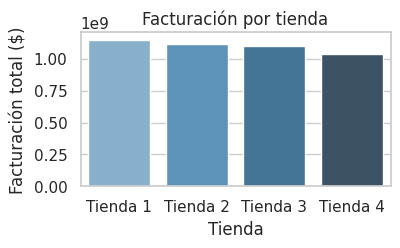

In [23]:
facturacion_por_tienda = datos.groupby("tienda")["Precio"].sum().sort_values(ascending=False)

plt.figure(figsize=(4, 2))
sns.barplot(x=facturacion_por_tienda.index, y=facturacion_por_tienda.values, palette="Blues_d")
plt.title("Facturación por tienda")
plt.ylabel("Facturación total ($)")
plt.xlabel("Tienda")
plt.show()


# 2. Ventas por categoría

In [29]:
ventas_categoria = datos.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
ventas_formateadas = ventas_categoria.apply(lambda x: f"${x:,.0f}")
print(ventas_formateadas)


Categoría del Producto
Electrónicos               $1,660,576,500
Electrodomésticos          $1,324,751,100
Muebles                      $757,661,000
Instrumentos musicales       $348,772,600
Deportes y diversión         $142,977,700
Juguetes                      $73,604,400
Artículos para el hogar       $57,579,800
Libros                        $37,696,100
Name: Precio, dtype: object


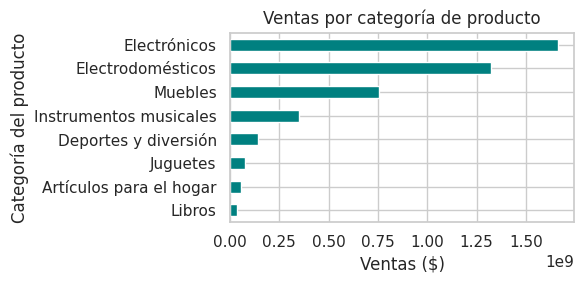

In [27]:
ventas_categoria = datos.groupby("Categoría del Producto")["Precio"].sum().sort_values()

plt.figure(figsize=(6, 3))
ventas_categoria.plot(kind='barh', color='teal')
plt.title("Ventas por categoría de producto")
plt.xlabel("Ventas ($)")
plt.ylabel("Categoría del producto")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [24]:
calificacion_promedio = datos.groupby("tienda")["Calificación"].mean()
print(calificacion_promedio)

tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


<ipython-input-31-2864840138>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calificacion_promedio.index, y=calificacion_promedio.values, palette="viridis")


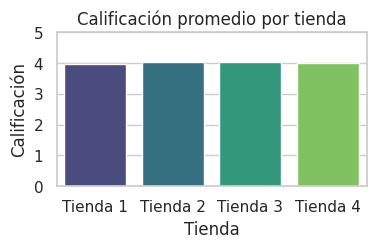

In [31]:
calificacion_promedio = datos.groupby("tienda")["Calificación"].mean()

plt.figure(figsize=(4, 2))
sns.barplot(x=calificacion_promedio.index, y=calificacion_promedio.values, palette="viridis")
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación")
plt.ylim(0, 5)  # Asumiendo calificación de 0 a 5
plt.xlabel("Tienda")
plt.show()



# 4. Productos más y menos vendidos

In [32]:
productos_vendidos = datos["Producto"].value_counts()

mas_vendido = productos_vendidos.idxmax()
menos_vendido = productos_vendidos.idxmin()

print("Producto más vendido:", mas_vendido)
print("Producto menos vendido:", menos_vendido)

Producto más vendido: Mesa de noche
Producto menos vendido: Celular ABXY


<ipython-input-34-309469838>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_vendidos.values, y=productos_vendidos.index, palette="magma")


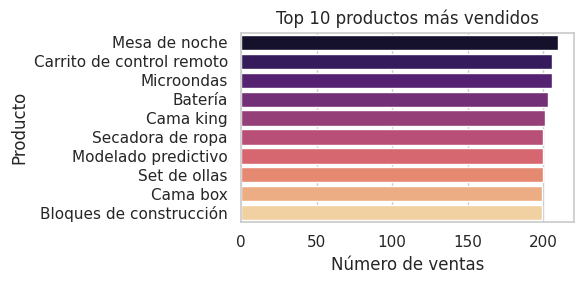

In [34]:
productos_vendidos = datos["Producto"].value_counts().head(10)

plt.figure(figsize=(6, 3))
sns.barplot(x=productos_vendidos.values, y=productos_vendidos.index, palette="magma")
plt.title("Top 10 productos más vendidos")
plt.xlabel("Número de ventas")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [35]:
envio_promedio = datos.groupby("tienda")["Costo de envío"].mean()
print(envio_promedio)

tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


<ipython-input-37-221539778>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=envio_promedio.index, y=envio_promedio.values, palette="coolwarm")


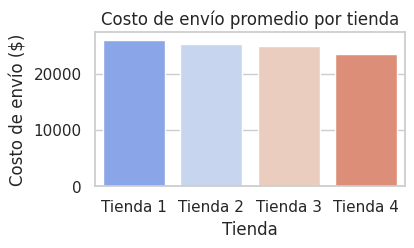

In [37]:
envio_promedio = datos.groupby("tienda")["Costo de envío"].mean()

plt.figure(figsize=(4, 2))
sns.barplot(x=envio_promedio.index, y=envio_promedio.values, palette="coolwarm")
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo de envío ($)")
plt.xlabel("Tienda")
plt.show()
